# Interpretowalność

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/tweets_features.csv", encoding='latin', nrows=10000)
df.drop(['is_after_certain_day', 'Date', 'User', 'Text', 'Time', 'Full_date'], axis=1, inplace=True)
df.head()

,Target,Weekday,Length,Hashtags,HasHashtags,Mentions,HasMentions,ExclamationMarks,HasExclamationMarks,Emoticons,...,w2v_90,w2v_91,w2v_92,w2v_93,w2v_94,w2v_95,w2v_96,w2v_97,w2v_98,w2v_99
0,0,3,67,0,False,1,True,0,False,[],...,0.426355,0.105600,0.099900,0.141384,0.683017,0.307975,0.141498,-0.470852,-0.146050,0.013814
1,1,3,93,0,False,1,True,0,False,[],...,0.893100,0.385402,-0.035950,-0.465414,1.386158,0.869907,0.718067,-0.696911,-0.041971,-0.195380
2,1,0,27,0,False,0,False,1,True,[],...,0.590157,0.242431,-0.339337,0.507457,1.383398,1.200003,0.258323,-0.451583,0.037492,0.057117
3,0,3,100,0,False,0,False,0,False,[],...,0.741138,0.014045,-0.037039,-0.300930,1.460556,0.542765,0.764829,-0.621368,-0.208227,-0.209104
4,0,4,52,0,False,0,False,1,True,[],...,0.621242,0.201937,-0.061574,0.177444,1.245472,0.712410,0.349455,-0.450614,0.096795,0.056020


In [4]:
selected_columns = ['Compound_VADER', 'skewed_hour_dist', 'Negative_VADER', 'Weekday',
                    'Polarity_TB', 'skewed_week_dist', 'Neutral_VADER', 'embedding_166',
                    'embedding_22', 'embedding_91', 'embedding_299', 'embedding_340',
                    'embedding_34', 'embedding_93', 'embedding_231', 'embedding_156',
                    'has_mentions', 'embedding_144', 'w2v_2', 'embedding_189',
                    'embedding_33']

df = df[selected_columns + ['Target']]
df.head()

,Compound_VADER,skewed_hour_dist,Negative_VADER,Weekday,Polarity_TB,skewed_week_dist,Neutral_VADER,embedding_166,embedding_22,embedding_91,...,embedding_34,embedding_93,embedding_231,embedding_156,has_mentions,embedding_144,w2v_2,embedding_189,embedding_33,Target
0,0.0000,1.0000,0.0,3,0.00,0.25,1.000,-0.068100,0.004035,-0.007670,...,-0.001950,0.055519,0.044527,-0.059406,1,0.028845,-0.038094,0.008712,0.002452,0
1,0.5994,0.8750,0.0,3,0.50,0.25,0.710,-0.008749,-0.000957,0.009721,...,-0.043903,0.031445,0.084876,0.042512,1,-0.002279,-0.259961,-0.014822,-0.035737,1
2,0.6239,0.5625,0.0,0,0.75,1.00,0.494,0.019995,0.023916,-0.056617,...,-0.055071,0.068575,0.117837,0.103600,0,-0.035295,0.102362,0.032799,-0.012978,1
3,0.0000,0.8750,0.0,3,0.00,0.25,1.000,0.007947,-0.003126,-0.039344,...,0.054924,0.024135,-0.064894,0.022700,0,-0.011716,-0.239940,-0.021231,0.015434,0
4,0.0000,0.1875,0.0,4,0.00,0.50,1.000,-0.028300,-0.048979,-0.128596,...,-0.009664,0.038363,0.065549,0.030836,0,-0.054347,-0.152541,-0.067483,0.044684,0


In [5]:
from sklearn.preprocessing import StandardScaler
X = df.drop(['Target'], axis=1)
y = df['Target']
X_numeric = X.select_dtypes(include=['number'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
X = pd.DataFrame(X_scaled, columns=X_numeric.columns)


## TUTAJ MODELA MOŻESZ USTAWIĆ

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model=XGBClassifier(random_state=1,
                    learning_rate=0.01,
                    booster='gbtree',
                    max_depth=4
                    )
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.802

## A TUTAJ PRZETESTOWAĆ

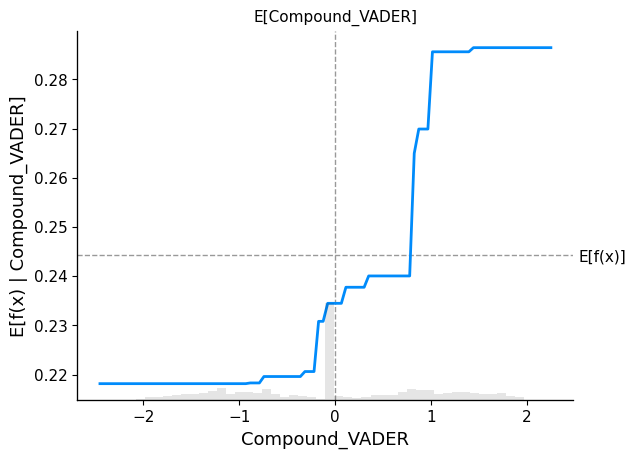

In [7]:

import os
import shap
import warnings
import matplotlib.pyplot as plt
def model_tf_proba(x):
   return model.predict_proba(x)[:,1]
def model_tf_log_odds(x):
    p=model.predict_log_proba(x)
    return p[:,1]-p[:,0]

fig,ax=shap.partial_dependence_plot(
    'Compound_VADER', model_tf_proba, X_train, model_expected_value=True, 
    feature_expected_value=True, show=False, ice=False
)
# Cechy do wyboru:
# 'Compound_VADER', 'skewed_hour_dist', 'Negative_VADER', 'Weekday',
#                     'Polarity_TB', 'skewed_week_dist', 'Neutral_VADER', 'embedding_166',
#                     'embedding_22', 'embedding_91', 'embedding_299', 'embedding_340',
#                     'embedding_34', 'embedding_93', 'embedding_231', 'embedding_156',
#                     'has_mentions', 'embedding_144', 'w2v_2', 'embedding_189',
#                     'embedding_33'


In [8]:
explainer=shap.Explainer(model, X_train)
shap_values=explainer(X_train)

100%|===================| 7988/8000 [00:18<00:00]        

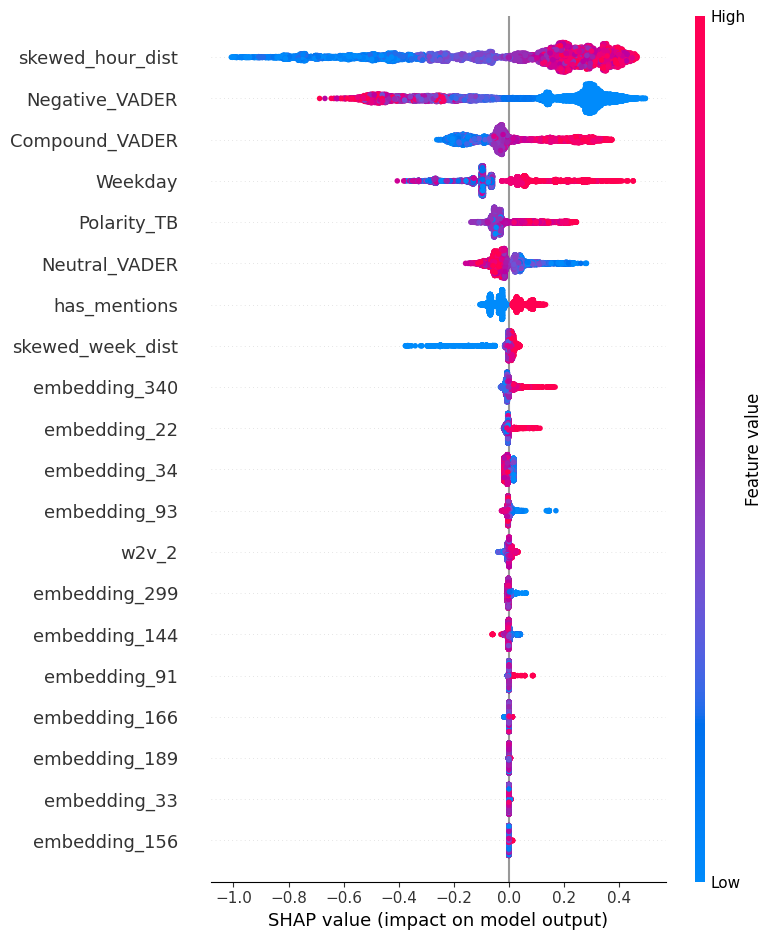

In [9]:
shap.summary_plot(shap_values,X_train)

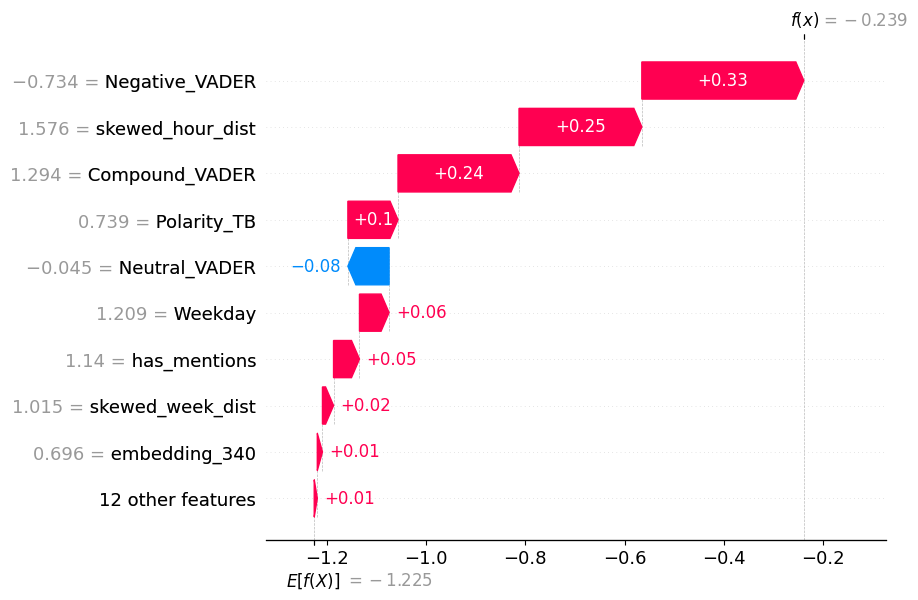

In [10]:
shap.plots.waterfall(shap_values[10]) #można się pobawić dla różnych wierszy

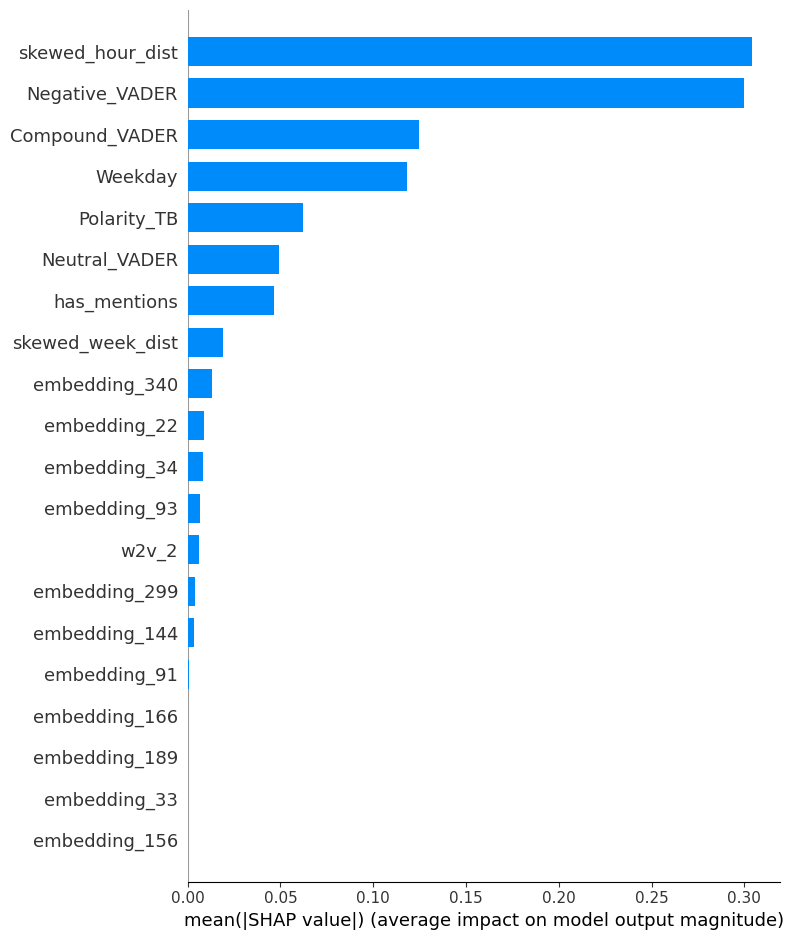

In [11]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

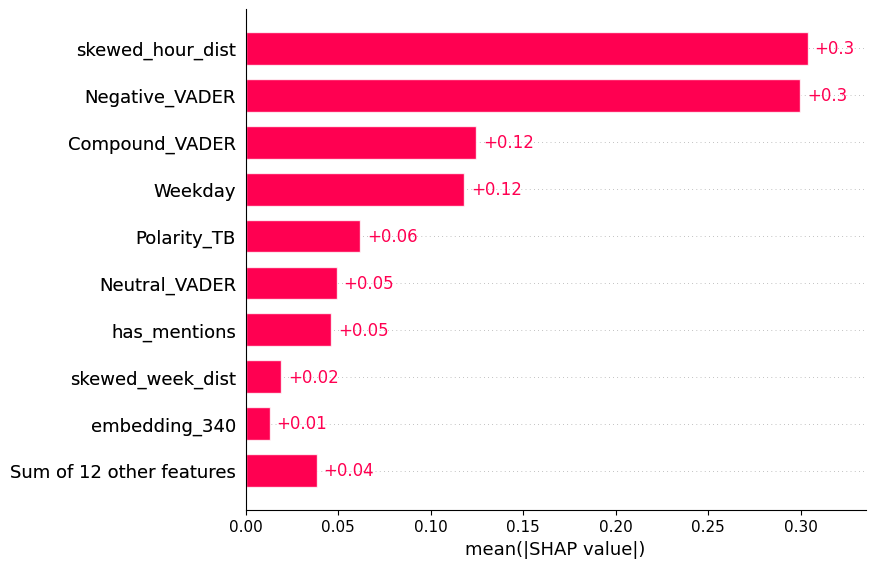

In [12]:
shap.plots.bar(shap_values)

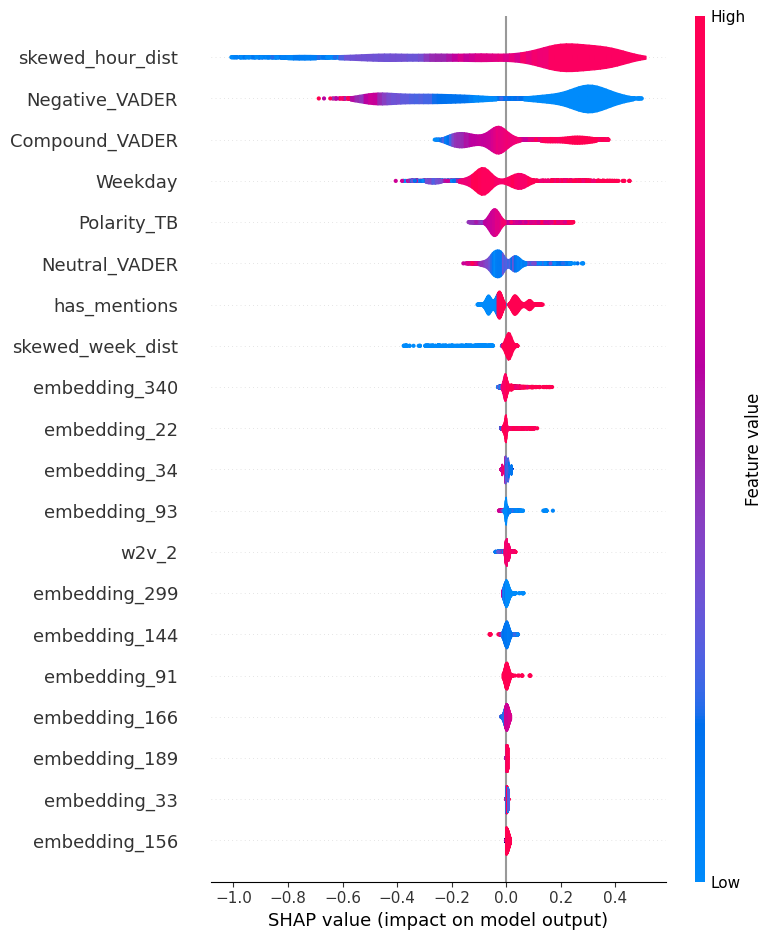

In [13]:
shap.summary_plot(shap_values, plot_type='violin') #Stradivarius normalnie

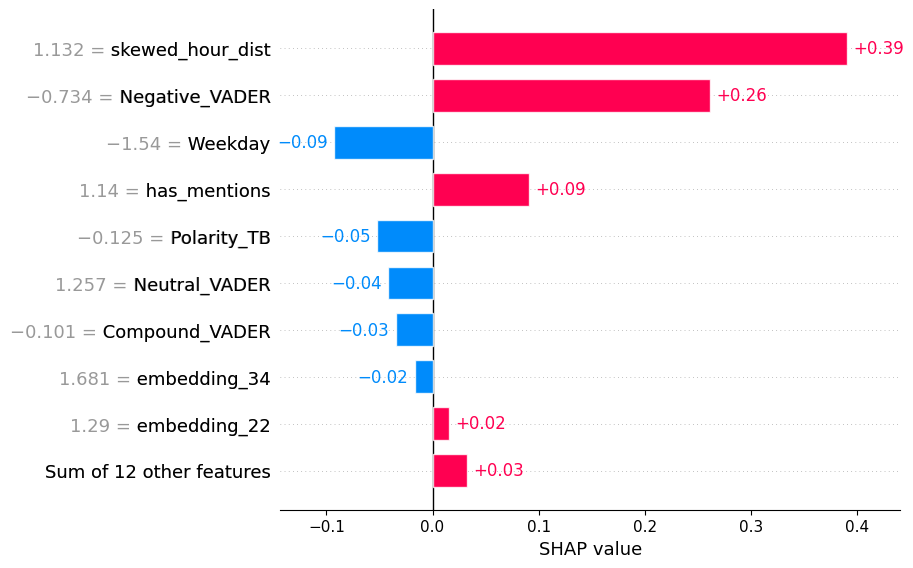

In [14]:
shap.plots.bar(shap_values[0])

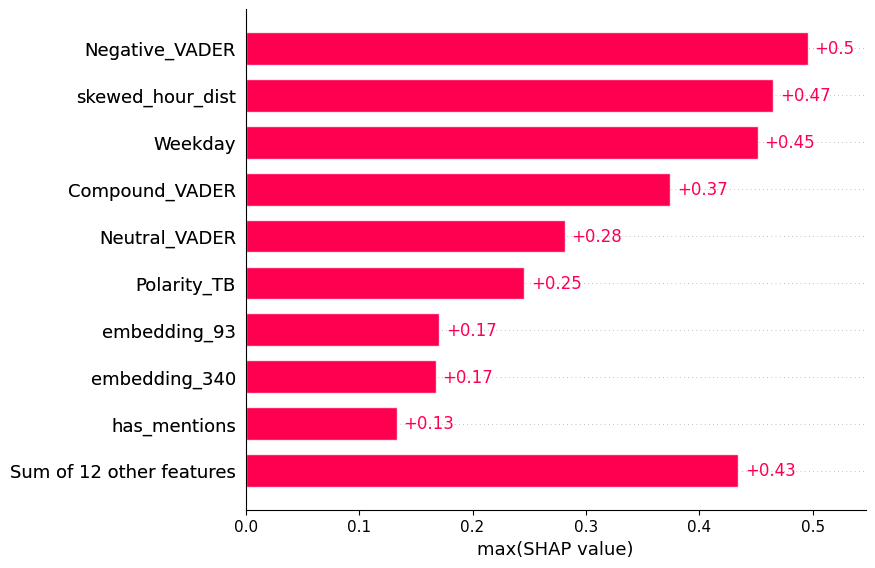

In [15]:
shap.plots.bar(shap_values.max(axis=0))

In [16]:
#shap.plots.heatmap(shap_values) Tworzenie się heatmapy trwa ruski rok

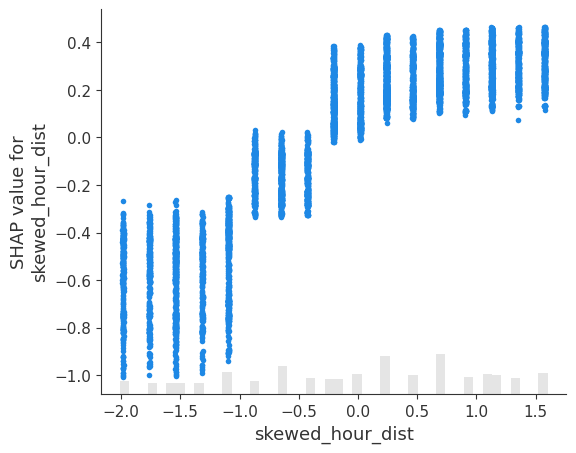

In [17]:
shap.plots.scatter(shap_values[:,"skewed_hour_dist"])